# Computers in Biology & Medicine

> A robust and generalized framework in diabetes classification across heterogeneous environments.
> A paper by Hejia Zhou, Saifur rahman, Maia Angelova, Clinton R. Bruce, Chandan Karmakar

This repository consists of code implementing a part of aforementioned paper.

In [1]:
# Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import calculate_nutritional_status

df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [30]:
from utils import calculate_empty_data_in_a_feature

# Calculate the number of zeros in SkinThickness
percent_zero_table = {}
features_to_calculate_missing_percentage = df.drop('Outcome',axis=1)
for column in features_to_calculate_missing_percentage:
    percent_zero_table[column] = calculate_empty_data_in_a_feature(column,features_to_calculate_missing_percentage)
print("Table 2: \nThe percentage of missing values for each feature in PIMA dataset")
percent_zero_table

Table 2: 
The percentage of missing values for each feature in PIMA dataset


{'Pregnancies': 14.5,
 'Glucose': 0.7,
 'BloodPressure': 4.6,
 'SkinThickness': 29.6,
 'Insulin': 48.7,
 'BMI': 1.4,
 'DiabetesPedigreeFunction': 0.0,
 'Age': 0.0}

In [31]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [32]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
from utils import check_column_types

check_column_types(df)

{'Pregnancies': 'discrete',
 'Glucose': 'continuous',
 'BloodPressure': 'continuous',
 'SkinThickness': 'continuous',
 'Insulin': 'continuous',
 'BMI': 'continuous',
 'DiabetesPedigreeFunction': 'continuous',
 'Age': 'continuous',
 'Outcome': 'discrete'}

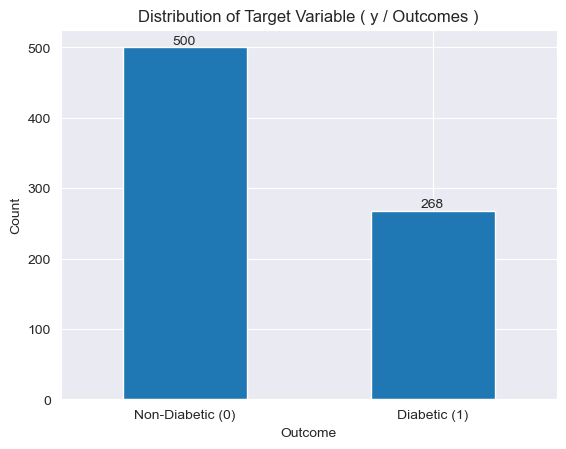

In [34]:
# Create a bar plot for the 'Outcome' variable
ax = df['Outcome'].value_counts().plot(kind='bar')

# Add axis labels and title
ax.set_xlabel('Outcome')
ax.set_ylabel('Count')
ax.set_title('Distribution of Target Variable ( y / Outcomes )')

# Customize x-axis tick labels for clarity
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Diabetic (0)', 'Diabetic (1)'], rotation=0)

for i, count in enumerate(df['Outcome'].value_counts()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

#### Column Data

In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

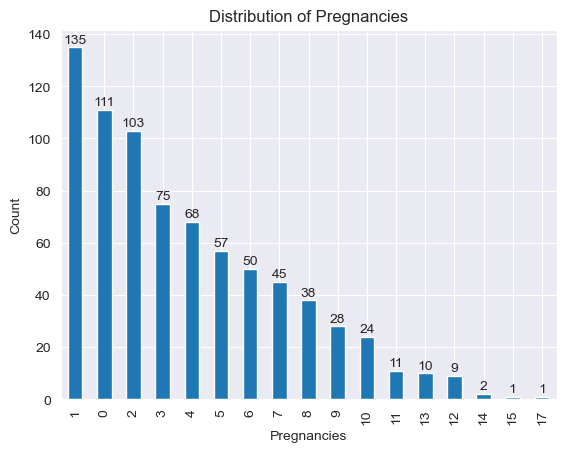

In [36]:

ax = df['Pregnancies'].value_counts().plot(kind='bar', xlabel='Pregnancies', ylabel='Count',
                                      title='Distribution of Pregnancies')

for i, count in enumerate(df['Pregnancies'].value_counts()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')
#
# # Display the plot
# plt.show()

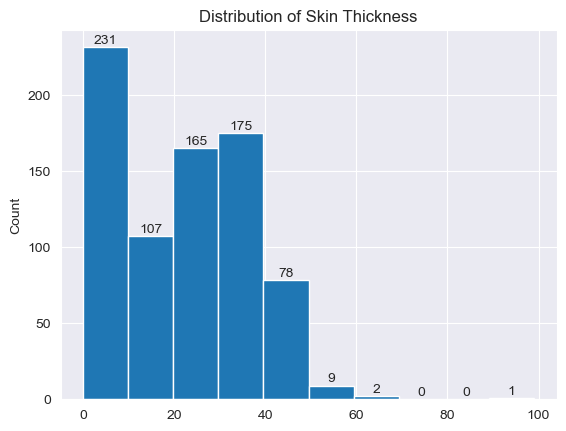

In [37]:
ax = df['SkinThickness'].plot(kind='hist', ylabel='Count',bins=10, title='Distribution of Skin Thickness')
# Get the heights and positions of the histogram bars
for patch in ax.patches:
    height = patch.get_height()  # Height of the bar (count)
    x = patch.get_x() + patch.get_width() / 2  # Center of the bar
    ax.text(x, height + 0.5, int(height), ha='center', va='bottom')

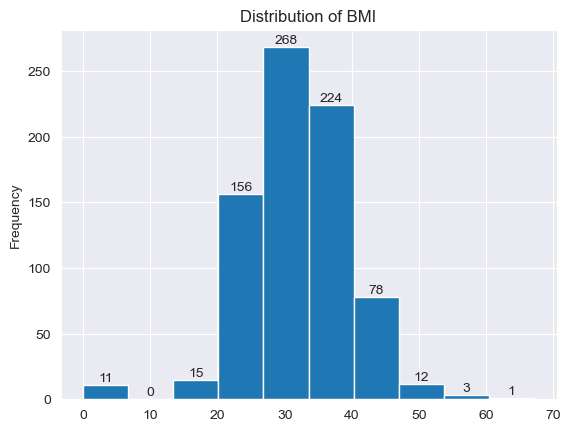

In [38]:
ax = df['BMI'].plot(kind='hist', bins=10, title='Distribution of BMI')
# Get the heights and positions of the histogram bars
for patch in ax.patches:
    height = patch.get_height()  # Height of the bar (count)
    x = patch.get_x() + patch.get_width() / 2  # Center of the bar
    ax.text(x, height + 0.5, int(height), ha='center', va='bottom')

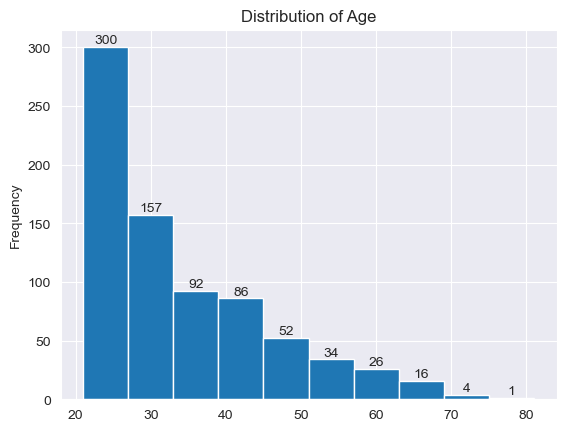

In [39]:
# Create the histogram
ax = df['Age'].plot(kind='hist', bins=10, title='Distribution of Age')

# Get the heights and positions of the histogram bars
for patch in ax.patches:
    height = patch.get_height()  # Height of the bar (count)
    x = patch.get_x() + patch.get_width() / 2  # Center of the bar
    ax.text(x, height + 0.5, int(height), ha='center', va='bottom')

plt.show()

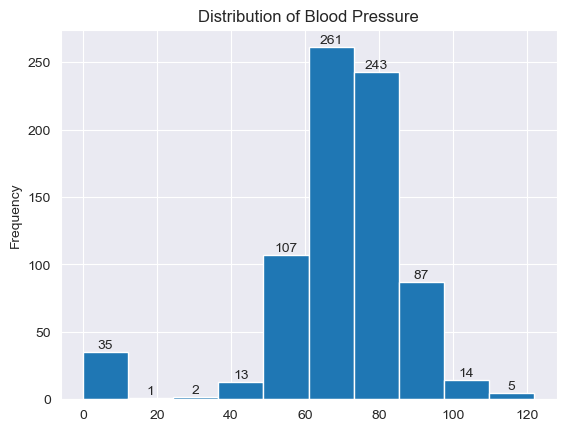

In [40]:
ax = df['BloodPressure'].plot(kind='hist', title='Distribution of Blood Pressure', bins=10)
# Get the heights and positions of the histogram bars
for patch in ax.patches:
    height = patch.get_height()  # Height of the bar (count)
    x = patch.get_x() + patch.get_width() / 2  # Center of the bar
    ax.text(x, height + 0.5, int(height), ha='center', va='bottom')

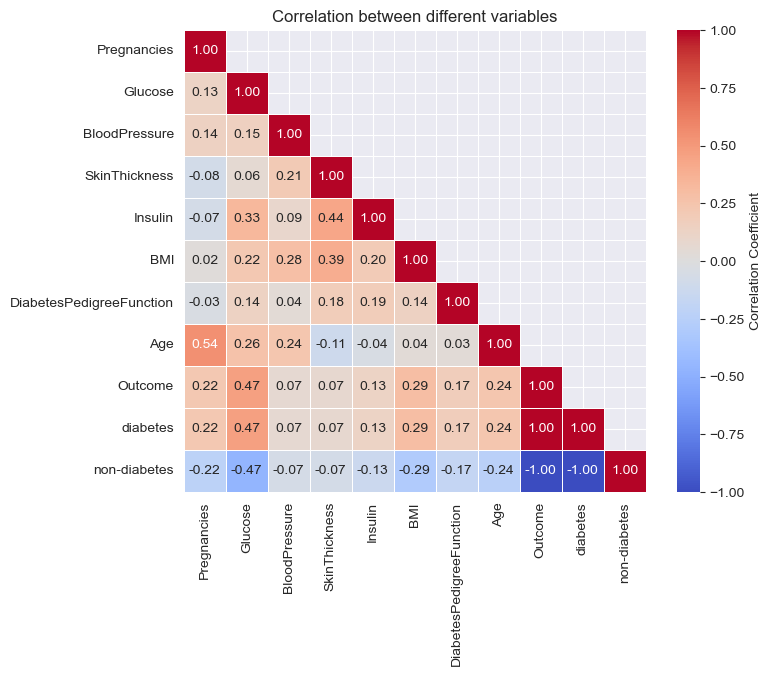

In [12]:

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the 'Outcome' column
# Step 1: Create dummy variables for 'Outcome'
heatmap_df = pd.read_csv('data/diabetes.csv')
heatmap_df['diabetes'] = heatmap_df['Outcome'].apply(lambda x: 1 if x == 1 else 0)
heatmap_df['non-diabetes'] = heatmap_df['Outcome'].apply(lambda x: 1 if x == 0 else 0)

# Data Cleaning
# heatmap_df = heatmap_df[(heatmap_df['Glucose'] != 0) & (heatmap_df['BloodPressure'] != 0) & (heatmap_df['BMI'] != 0)]
# scaler = StandardScaler()
# heatmap_df = scaler.fit_transform(heatmap_df.drop(['Outcome'],axis=1),heatmap_df['Outcome'])

# heatmap_df.drop('Outcome',axis=1,inplace=True)

# Step 2: Compute the correlation matrix
corr_matrix = heatmap_df.corr()

# Step 3: Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool),k=1.0)

# Step 4: Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Step 5: Draw the heatmap with the mask (lower triangle only)
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            fmt='.2f', # Limit to 2 decimal places
            vmin=-1, vmax=1,  # Range for correlation values
            center=0,  # Center point of colormap
            square=True,  # Make cells square
            linewidths=0.5,  # Lines between cells
            cbar_kws={'label': 'Correlation Coefficient'})  # Colorbar label

# Step 6: Add title
plt.title('Correlation between different variables')

# Step 7: Show the plot
plt.show()

# Adding New Columns --

In [ ]:
df = calculate_nutritional_status(df)
df